## Statistical Models

In [ ]:
# !pip3 install statsforecast
# !pip3 install -U kaleido

In [5]:
from statsforecast import StatsForecast
from statsforecast.models import AutoRegressive
import pandas as pd
import numpy as np
import plotly.express as px
import os
import matplotlib.pyplot as plt


### RENergetic

In [2]:
renergetic_csv_path = 'E:\master thesis\datasets\REnergetic\debit2_2020_2021.csv'
renergetic_NoOutlier_csv_path = 'E:\master thesis\datasets\REnergetic\debit2_2020_2021_NoOutlier.csv'
rawData_NoOutlier = pd.read_csv(renergetic_NoOutlier_csv_path)
rawData = pd.read_csv(renergetic_csv_path)

In [3]:
# renergetic
data = pd.DataFrame({
#                      "unique_id":rawData["OSR_Building"],
                     "ds":       rawData["timestamp"],
                     "y":        rawData["MW"],
                    #  "m3_h":     rawData["m3_h"],
                    #  "TEMP_OUT": rawData["TEMP_OUT"],
                    #  "day_of_week":    rawData["day_of_week"]
                     })

data_NoOutlier = pd.DataFrame({
#                                 "unique_id":rawData_NoOutlier["OSR_Building"],
                                "ds":       rawData_NoOutlier["timestamp"],
                                "y":        rawData_NoOutlier["MW"],
                                # "m3_h":     rawData_NoOutlier["m3_h"],
                                # "TEMP_OUT": rawData_NoOutlier["TEMP_OUT"],
                                # "day_of_week":    rawData_NoOutlier["day_of_week"]
                                })

trainEndBoundary = '2021-11-01'
validStartBoundary = '2021-11-01'
validEndBoundary = '2021-12-01'
testStartBoundary = '2021-12-01'
testEndBoundary = '2021-12-31'
index = data['ds']
train = data.loc[index <= trainEndBoundary]
valid = data_NoOutlier.loc[(index >= validStartBoundary) & (index <= validEndBoundary)]
# valid = data.loc[(index >= validStartBoundary) & (index <= validEndBoundary)]
test  = data_NoOutlier.loc[(index >= testStartBoundary) & (index <= testEndBoundary)]
# test  = data.loc[(index >= testStartBoundary) & (index <= testEndBoundary)]

train_valid = pd.concat([train, valid])
trainData = train_valid
# trainData = train

# valid_test = pd.concat([valid, test])
# testData = valid_test
# testData = valid
testData = test

testData['ds'] = testData['ds'].astype('datetime64[ns]')
testData['ds'] = testData['ds'].dt.round("H")
trainData['ds'] = trainData['ds'].astype('datetime64[ns]')
trainData['ds'] = trainData['ds'].dt.round("H")

lookback = 3*24
dataFreq = '1h'

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Office

In [2]:
office_csv_path = 'E:\master thesis\datasets\office dataset\office.csv'
os.path.exists(office_csv_path)
rawData = pd.read_csv(office_csv_path)

In [3]:
# office
data = pd.DataFrame({
#                      "unique_id"      : rawData["data_name"],
                     "ds"             : rawData["date"],
                     "y"              : rawData["energy_south_total"],
#                      "dew_temp"       : rawData["dew_point_temperature_set_1d"],
#                      "humidity"       : rawData["relative_humidity_set_1"],
#                      "solar_radiation": rawData["solar_radiation_set_1"],
#                      "out_temp"       : rawData["air_temp_set_1_2"],
#                      "in_temp"        : rawData["internal_temp"],
#                      "occ"            : rawData["occ_south_total"],
#                      "month"          : rawData["month"]
                     })

trainEndBoundary = '2019-02-03'
validStartBoundary = '2019-02-03'
validEndBoundary = '2019-02-10'
testStartBoundary = '2019-02-10'
testEndBoundary = '2019-02-21'
index = data['ds']
train = data.loc[index <= trainEndBoundary]
valid = data.loc[(index >= validStartBoundary) & (index <= validEndBoundary)]
test  = data.loc[(index >= testStartBoundary) & (index <= testEndBoundary)]

train_valid = pd.concat([train, valid])
trainData = train_valid
# trainData = train

# valid_test = pd.concat([valid, test])
# testData = valid_test
testData = test

testData['ds'] = testData['ds'].astype('datetime64[ns]')
trainData['ds'] = trainData['ds'].astype('datetime64[ns]')

lookback = 3*4*24
dataFreq = '15min'

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Training & Evaluation

In [11]:
dataset = "renergetic"

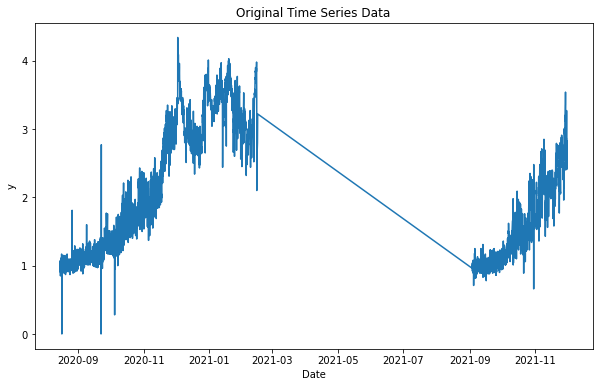

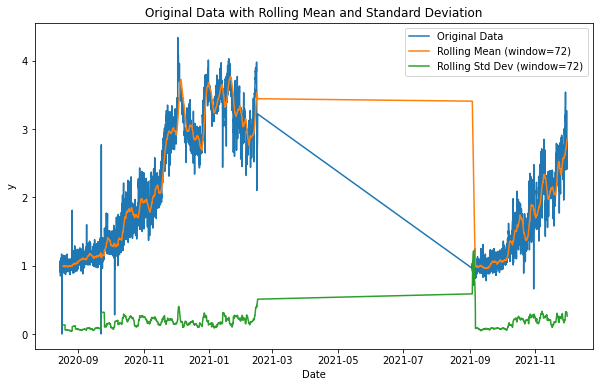

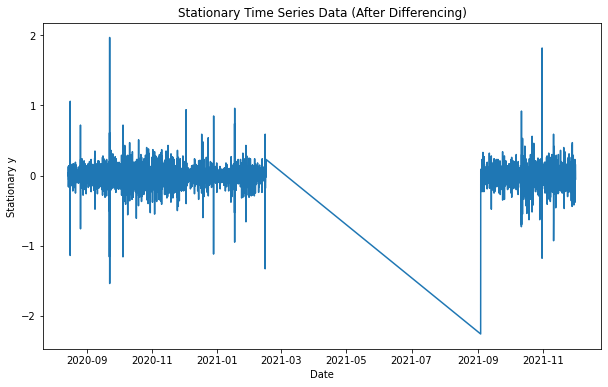

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [6]:
# Visualize the original time series data
plt.figure(figsize=(10, 6))
plt.plot(trainData["ds"], trainData['y'])
plt.title('Original Time Series Data')
plt.xlabel('Date')
plt.ylabel('y')
plt.show()

# Check for stationarity using a rolling mean and rolling standard deviation
rolling_mean = trainData['y'].rolling(window=lookback).mean()
rolling_std = trainData['y'].rolling(window=lookback).std()

plt.figure(figsize=(10, 6))
plt.plot(trainData["ds"], trainData['y'], label='Original Data')
plt.plot(trainData["ds"], rolling_mean, label='Rolling Mean (window={})'.format(lookback))
plt.plot(trainData["ds"], rolling_std, label='Rolling Std Dev (window={})'.format(lookback))
plt.legend()
plt.title('Original Data with Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('y')
plt.show()

# Perform differencing to make the data stationary
trainData['stationary_y'] = trainData['y'].diff()

# Drop rows with NaN values (resulting from differencing)
trainData.dropna(inplace=True)

# Visualize the stationary data
plt.figure(figsize=(10, 6))
plt.plot(trainData["ds"], trainData['stationary_y'])
plt.title('Stationary Time Series Data (After Differencing)')
plt.xlabel('Date')
plt.ylabel('Stationary y')
plt.show()

# Perform differencing to make the data stationary
trainData['stationary_y'] = trainData['y'].diff()
# Drop rows with NaN values (resulting from differencing)
trainData.dropna(inplace=True)

# Perform differencing to make the data stationary
testData['stationary_y'] = testData['y'].diff()
# Drop rows with NaN values (resulting from differencing)
testData.dropna(inplace=True)

In [7]:
ar = AutoRegressive(lags=[lookback])
ar = ar.fit(y=trainData["stationary_y"].values)
horizon = len(testData)
y_hat_dict = ar.predict(h=horizon, level=[90])

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:829: UserWarning: some AR parameters were fixed: setting transform_pars = False
  "some AR parameters were fixed: setting transform_pars = False"


In [12]:
y_array = testData['stationary_y'].values
yhat_array = y_hat_dict['mean']
yList = []
yHatList = []
for idx in range(len(y_array)):
    yList.append(y_array[idx])
    yHatList.append(yhat_array[idx])

results_df = pd.DataFrame(columns=['predicted', 'observed'])
results_df['predicted'] = yHatList
results_df['observed']  = yList

np.save('ar_{}_pred.npy'.format(dataset), results_df["predicted"])
np.save('ar_{}_true.npy'.format(dataset), results_df["observed"])


In [13]:
# Performance metrics

def MAE(pred, true):
    return np.mean(np.abs(pred - true))

def MSE(pred, true):
    return np.mean((pred - true) ** 2)

def RMSE(pred, true):
    return np.sqrt(MSE(pred, true))

def MAPE(pred, true):
    return np.mean(np.abs((pred - true) / true))

def sMAPE(pred, true):
    return 100/len(true) * np.sum(2 * np.abs(pred - true) / (np.abs(true) + np.abs(pred)))

def metric(pred, true):
    pred = np.array(pred)
    true = np.array(true)

    mae = MAE(pred, true)
    mse = MSE(pred, true)
    rmse = RMSE(pred, true)
    mape = MAPE(pred, true)
    smape = sMAPE(pred, true)

    return mae, mse, rmse, mape, smape

In [14]:
results_df.head()

,predicted,observed
0,0.003023,0.08
1,-0.003193,0.21
2,0.003023,-0.02
3,0.005786,-0.02
4,-0.000430,-0.04


In [15]:
results_df = pd.DataFrame(columns=['predicted', 'observed'])
results_df['predicted'] = np.load('ar_{}_pred.npy'.format(dataset))
results_df['observed']  = np.load('ar_{}_true.npy'.format(dataset))

# Writing the figure visalizing the predictions and ground truth with performance metrics in the disk 
fig = px.line(results_df, x=results_df.index,  y=["observed","predicted"])
fig.update_layout(
height=400, 
width=700,
xaxis_title="Horizon Time Steps",
yaxis_title="Normalized Patv",
legend_title="Variables")

mae, mse, rmse, mape, smape = metric(results_df['predicted'], results_df['observed'])
figName = "ar_{}_{:.2f}_{:.2f}_{:.2f}_{:.2f}_{:.2f}.png".format(dataset, mae, mse, rmse, mape, smape)
# figPath = os.path.join(outDirPath, figName)
fig.write_image(figName)

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning:

divide by zero encountered in true_divide



In [17]:
# models = [AutoRegressive(lags=[lookback])]

# sf = StatsForecast(
#     models=models,
#     freq=dataFreq,
#     n_jobs=-1
# )

# crossvalidation_df = sf.cross_validation(
#     df = trainData,
#     h = 1,
#     step_size = 1,
#     n_windows = len(testData)
#   )

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:829: UserWarning:

some AR parameters were fixed: setting transform_pars = False

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:680: RuntimeWarning:

overflow encountered in subtract

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:829: UserWarning:

some AR parameters were fixed: setting transform_pars = False

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:829: UserWarning:

some AR parameters were fixed: setting transform_pars = False

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:829: UserWarning:

some AR parameters were fixed: setting transform_pars = False

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:680: RuntimeWarning:

overflow encountered in subtra

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:829: UserWarning:

some AR parameters were fixed: setting transform_pars = False

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:829: UserWarning:

some AR parameters were fixed: setting transform_pars = False

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:829: UserWarning:

some AR parameters were fixed: setting transform_pars = False

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:829: UserWarning:

some AR parameters were fixed: setting transform_pars = False

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:680: RuntimeWarning:

overflow encountered in subtract

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:829: UserWarning:

some AR parameters were fixed: se

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:829: UserWarning:

some AR parameters were fixed: setting transform_pars = False

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:829: UserWarning:

some AR parameters were fixed: setting transform_pars = False

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:829: UserWarning:

some AR parameters were fixed: setting transform_pars = False

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:829: UserWarning:

some AR parameters were fixed: setting transform_pars = False

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:829: UserWarning:

some AR parameters were fixed: setting transform_pars = False

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:829: UserWarning:

some AR

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:829: UserWarning:

some AR parameters were fixed: setting transform_pars = False

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:829: UserWarning:

some AR parameters were fixed: setting transform_pars = False

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:829: UserWarning:

some AR parameters were fixed: setting transform_pars = False

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:829: UserWarning:

some AR parameters were fixed: setting transform_pars = False

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:829: UserWarning:

some AR parameters were fixed: setting transform_pars = False

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:829: UserWarning:

some AR

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:680: RuntimeWarning:

overflow encountered in subtract

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:829: UserWarning:

some AR parameters were fixed: setting transform_pars = False

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:829: UserWarning:

some AR parameters were fixed: setting transform_pars = False

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:680: RuntimeWarning:

overflow encountered in subtract

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\statsforecast\arima.py:829: UserWarning:

some AR parameters were fixed: setting transform_pars = False



KeyboardInterrupt: 